# Importando módulos python

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import missingno as msno
%matplotlib inline

# Definições

In [2]:
SEED=0
np.random.seed(SEED)
random.seed(SEED)

cadeia_preprocessamento = {
    'SVC': [],
    'DT': [],
    'RF': [],
    'KNN': [],
}

def avalia(feats, labels, modelo, leg=['Died', 'Lived'], titulo=''):
    
  labels_pred = modelo.predict(feats)

  accuracy = accuracy_score(labels, labels_pred)
  print('Acurácia: ', accuracy)

  kappa = cohen_kappa_score(labels, labels_pred)
  print('Kappa: ', kappa)

  f1 = f1_score(labels, labels_pred, average='weighted')
  print('F1: ', f1)

  confMatrix = confusion_matrix(labels_pred, labels)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  if titulo:
      plt.title('Matriz de Confusão' + ' ' + titulo)
  else:
      plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(leg) 
  ax.yaxis.set_ticklabels(leg)
  plt.show()

def preprocessaSVC(feats):
    for pre in cadeia_preprocessamento['SVC']:
        feats = pre.transform(feats)
    return feats

def preprocessaDT(feats):
    for pre in cadeia_preprocessamento['DT']:
        feats = pre.transform(feats)
    return feats

def preprocessaRF(feats):
    for pre in cadeia_preprocessamento['DT']:
        feats = pre.transform(feats)
    return feats

def preprocessaKNN(feats):
    for pre in cadeia_preprocessamento['KNN']:
        feats = pre.transform(feats)
    return feats

def treinaSVC(feats, labels):
  model = SVC(max_iter= 10000)
  model.fit(feats, labels)
  return model

def treinaDT(feats, labels):
  model = DecisionTreeClassifier()
  model.fit(feats, labels)
  return model

def treinaRF(feats, labels):
  model = RandomForestClassifier()
  model.fit(feats, labels)
  return model

def treinaKNN(feats, labels):
  model = KNeighborsClassifier()
  model.fit(feats, labels)
  return model

# Carregando as bases de treino e teste

## Treino

In [3]:
# df_treino = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/horses/horse.csv')
df_treino = pd.read_csv('horse.csv')
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [4]:
df_treino.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

## Teste

In [5]:
# df_teste = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/horses/horseTest.csv')
df_teste = pd.read_csv('horseTest.csv')
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                89 non-null     object 
 1   age                    89 non-null     object 
 2   hospital_number        89 non-null     int64  
 3   rectal_temp            73 non-null     float64
 4   pulse                  84 non-null     float64
 5   respiratory_rate       73 non-null     float64
 6   temp_of_extremities    76 non-null     object 
 7   peripheral_pulse       70 non-null     object 
 8   mucous_membrane        79 non-null     object 
 9   capillary_refill_time  85 non-null     object 
 10  pain                   77 non-null     object 
 11  peristalsis            79 non-null     object 
 12  abdominal_distention   77 non-null     object 
 13  nasogastric_tube       66 non-null     object 
 14  nasogastric_reflux     61 non-null     object 
 15  nasogast

In [6]:
df_teste.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult                1         37.3  104.0              35.0   
1      no  adult                2         39.1   72.0              52.0   
2     yes  adult                3         37.2   42.0              12.0   
3      no  young                4         38.0   92.0              28.0   
4     yes  adult                5         37.6   64.0              21.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                 NaN              NaN   dark_cyanotic            more_3_sec   
1                warm              NaN     bright_pink            less_3_sec   
2                warm           normal     normal_pink            less_3_sec   
3              normal           normal     bright_pink            less_3_sec   
4              normal           normal     bright_pink            less_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               74.0           7.4               NaN            NaN   
1  ...               50.0           7.8               NaN            NaN   
2  ...                NaN           7.0               NaN            NaN   
3  ...               37.0           6.1             clear            NaN   
4  ...               40.0           7.0             clear            NaN   

  outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0    died               no     4300        0         0       no  
1   lived              yes     2111        0         0       no  
2   lived               no     4124        0         0       no  
3    died               no        0        0         0      yes  
4   lived              yes     4205        0         0      yes  

[5 rows x 28 columns]

# União das bases para tratamento

Para fazer um tratamento único nos dados (dummy encoding), vou unir as bases em um só data frame mas vou manter o rastro do que é teste e treino.

In [7]:
df_treino['origem'] = ('treino '*len(df_treino)).split()
df_teste['origem'] = ('teste '*len(df_teste)).split()
data = pd.concat([df_treino, df_teste])
data = data.reindex()
data

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0       no  adult           530101         38.5   66.0              28.0   
1      yes  adult           534817         39.2   88.0              20.0   
2       no  adult           530334         38.3   40.0              24.0   
3      yes  young          5290409         39.1  164.0              84.0   
4       no  adult           530255         37.3  104.0              35.0   
..     ...    ...              ...          ...    ...               ...   
84     yes  adult               85          NaN    NaN               NaN   
85      no  adult               86         38.6   45.0              16.0   
86     yes  adult               87         38.9   80.0              44.0   
87     yes  adult               88         37.0   66.0              20.0   
88     yes  adult               89         36.5  100.0              24.0   

   temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                 cool          reduced             NaN            more_3_sec   
1                  NaN              NaN   pale_cyanotic            less_3_sec   
2               normal           normal       pale_pink            less_3_sec   
3                 cold           normal   dark_cyanotic            more_3_sec   
4                  NaN              NaN   dark_cyanotic            more_3_sec   
..                 ...              ...             ...                   ...   
84                 NaN              NaN             NaN                   NaN   
85                warm           normal     bright_pink            less_3_sec   
86                cool          reduced       pale_pink            less_3_sec   
87              normal          reduced     bright_pink            less_3_sec   
88                cool          reduced       pale_pink            less_3_sec   

    ... total_protein abdomo_appearance abdomo_protein     outcome  \
0   ...           8.4               NaN            NaN        died   
1   ...          85.0            cloudy            2.0  euthanized   
2   ...           6.7               NaN            NaN       lived   
3   ...           7.2     serosanguious            5.3        died   
4   ...           7.4               NaN            NaN        died   
..  ...           ...               ...            ...         ...   
84  ...           NaN               NaN            NaN       lived   
85  ...          58.0               NaN            NaN       lived   
86  ...           6.5     serosanguious            NaN        died   
87  ...           6.9            cloudy            NaN        died   
88  ...           6.0     serosanguious            3.4       lived   

   surgical_lesion  lesion_1 lesion_2 lesion_3  cp_data  origem  
0               no     11300        0        0       no  treino  
1               no      2208        0        0       no  treino  
2               no         0        0        0      yes  treino  
3              yes      2208        0        0      yes  treino  
4               no      4300        0        0       no  treino  
..             ...       ...      ...      ...      ...     ...  
84             yes      2124        0        0       no   teste  
85              no         0        0        0       no   teste  
86             yes      7111        0        0       no   teste  
87             yes     31110        0        0       no   teste  
88             yes      2208        0        0      yes   teste  

[388 rows x 29 columns]

# Trocar euthanized por died

In [8]:
data['outcome'] = data['outcome'].map(lambda v: 'died' if v == 'euthanized' else v)

# Remover atributos desenessários segundo dicionário de dados

In [9]:
data = data.drop(columns=['cp_data', 'hospital_number'])
data.head()

surgery    age  rectal_temp  pulse  respiratory_rate temp_of_extremities  \
0      no  adult         38.5   66.0              28.0                cool   
1     yes  adult         39.2   88.0              20.0                 NaN   
2      no  adult         38.3   40.0              24.0              normal   
3     yes  young         39.1  164.0              84.0                cold   
4      no  adult         37.3  104.0              35.0                 NaN   

  peripheral_pulse mucous_membrane capillary_refill_time          pain  ...  \
0          reduced             NaN            more_3_sec  extreme_pain  ...   
1              NaN   pale_cyanotic            less_3_sec     mild_pain  ...   
2           normal       pale_pink            less_3_sec     mild_pain  ...   
3           normal   dark_cyanotic            more_3_sec     depressed  ...   
4              NaN   dark_cyanotic            more_3_sec           NaN  ...   

  packed_cell_volume total_protein abdomo_appearance abdomo_protein  outcome  \
0               45.0           8.4               NaN            NaN     died   
1               50.0          85.0            cloudy            2.0     died   
2               33.0           6.7               NaN            NaN    lived   
3               48.0           7.2     serosanguious            5.3     died   
4               74.0           7.4               NaN            NaN     died   

  surgical_lesion lesion_1  lesion_2  lesion_3  origem  
0              no    11300         0         0  treino  
1              no     2208         0         0  treino  
2              no        0         0         0  treino  
3             yes     2208         0         0  treino  
4              no     4300         0         0  treino  

[5 rows x 27 columns]

# Frequência dos valores dos atributos

In [10]:
for attr in data.columns:
    print(data[attr].value_counts())
    print()

yes    232
no     156
Name: surgery, dtype: int64

adult    354
young     34
Name: age, dtype: int64

38.0    37
38.5    24
37.8    24
38.3    23
38.6    18
38.2    17
37.5    14
38.4    14
38.1    13
37.9     9
38.8     9
37.7     9
37.6     8
37.3     8
37.2     8
38.7     8
38.9     6
39.2     6
39.0     6
39.4     5
39.3     5
39.5     5
37.0     4
36.5     4
37.1     4
39.1     3
37.4     3
40.8     2
36.1     2
36.0     2
39.7     2
40.3     2
35.4     1
39.6     1
40.0     1
36.9     1
36.6     1
36.8     1
39.9     1
36.4     1
Name: rectal_temp, dtype: int64

48.0     33
60.0     31
40.0     22
42.0     15
88.0     15
100.0    15
120.0    14
72.0     14
44.0     13
64.0     13
54.0     13
52.0     12
80.0     11
56.0     11
84.0     10
96.0     10
104.0     8
66.0      8
70.0      6
50.0      6
68.0      5
36.0      5
92.0      5
76.0      5
86.0      4
78.0      4
108.0     4
112.0     4
45.0      3
140.0     3
150.0     3
90.0      3
130.0     3
82.0      2
129.0     2
46.0 

# Label, variáveis categóricas e numéricas

In [11]:
categoricas = data.columns[data.dtypes==object].tolist()
numericas = data.columns[data.dtypes!=object].tolist()
label = 'outcome'
categoricas.remove(label)
categoricas.remove('origem')

# Análise dos dados

## Shape

In [12]:
data.shape

(388, 27)

## Stats

In [13]:
(data.loc[data.origem == 'treino']).describe()

rectal_temp       pulse  respiratory_rate  nasogastric_reflux_ph  \
count   239.000000  275.000000        241.000000              53.000000   
mean     38.168619   72.000000         30.460581               4.707547   
std       0.733744   28.646219         17.666102               1.982311   
min      35.400000   30.000000          8.000000               1.000000   
25%      37.800000   48.000000         18.000000               3.000000   
50%      38.200000   64.000000         25.000000               5.000000   
75%      38.500000   88.000000         36.000000               6.500000   
max      40.800000  184.000000         96.000000               7.500000   

       packed_cell_volume  total_protein  abdomo_protein      lesion_1  \
count          270.000000     266.000000      101.000000    299.000000   
mean            46.307407      24.274436        3.039604   3659.709030   
std             10.436743      27.364194        1.967947   5408.472421   
min             23.000000       3.300000        0.100000      0.000000   
25%             38.000000       6.500000        2.000000   2111.500000   
50%             45.000000       7.500000        2.300000   2322.000000   
75%             52.000000      56.750000        3.900000   3209.000000   
max             75.000000      89.000000       10.100000  41110.000000   

          lesion_2     lesion_3  
count   299.000000   299.000000  
mean     90.528428     7.387960  
std     650.637139   127.749768  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max    7111.000000  2209.000000

> 299 linhas na base de treino mas muitos atributos apresentam missing

In [14]:
(data.loc[data.origem == 'teste']).describe()

rectal_temp       pulse  respiratory_rate  nasogastric_reflux_ph  \
count    73.000000   84.000000         73.000000              14.000000   
mean     38.175342   74.797619         34.232877               5.028571   
std       0.808768   31.099831         19.158346               1.728240   
min      36.000000   36.000000          9.000000               2.000000   
25%      37.800000   52.500000         20.000000               4.125000   
50%      38.100000   65.000000         30.000000               5.150000   
75%      38.600000   93.000000         42.000000               6.625000   
max      40.800000  184.000000         90.000000               7.200000   

       packed_cell_volume  total_protein  abdomo_protein      lesion_1  \
count           82.000000      79.000000       29.000000     89.000000   
mean            45.621951      22.930380        2.782759   4582.415730   
std              9.196940      26.512955        2.251042   7088.406982   
min             31.000000       3.300000        1.000000      0.000000   
25%             39.000000       6.500000        1.300000   2111.000000   
50%             44.000000       7.300000        2.000000   3111.000000   
75%             50.000000      54.500000        3.200000   4206.000000   
max             74.000000      89.000000       10.100000  41110.000000   

          lesion_2     lesion_3  
count    89.000000    89.000000  
mean    218.483146    24.820225  
std    1082.038807   234.153532  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max    7111.000000  2209.000000

> **89 linhas na base de treino mas muitos atributos apresentam missing**

## Missing values

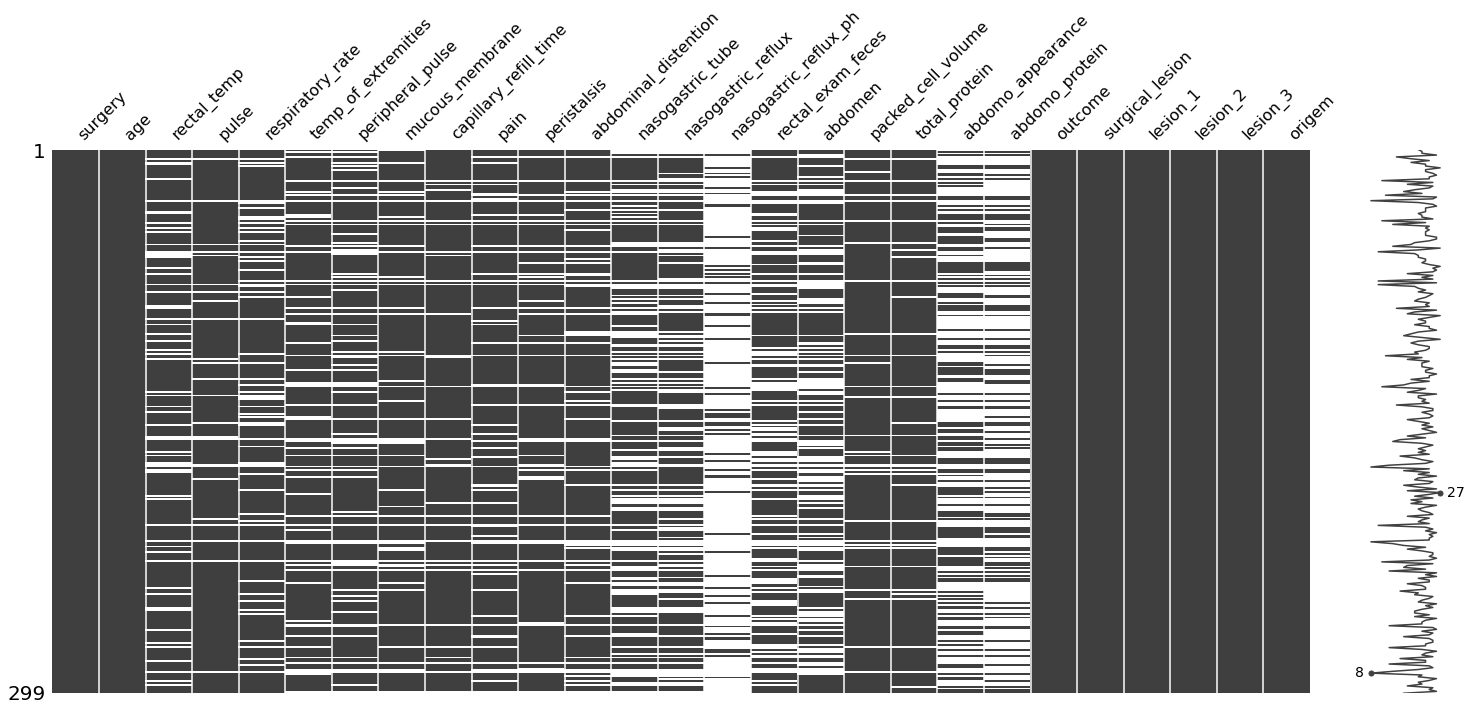

In [15]:
msno.matrix((data.loc[data.origem == 'treino']));

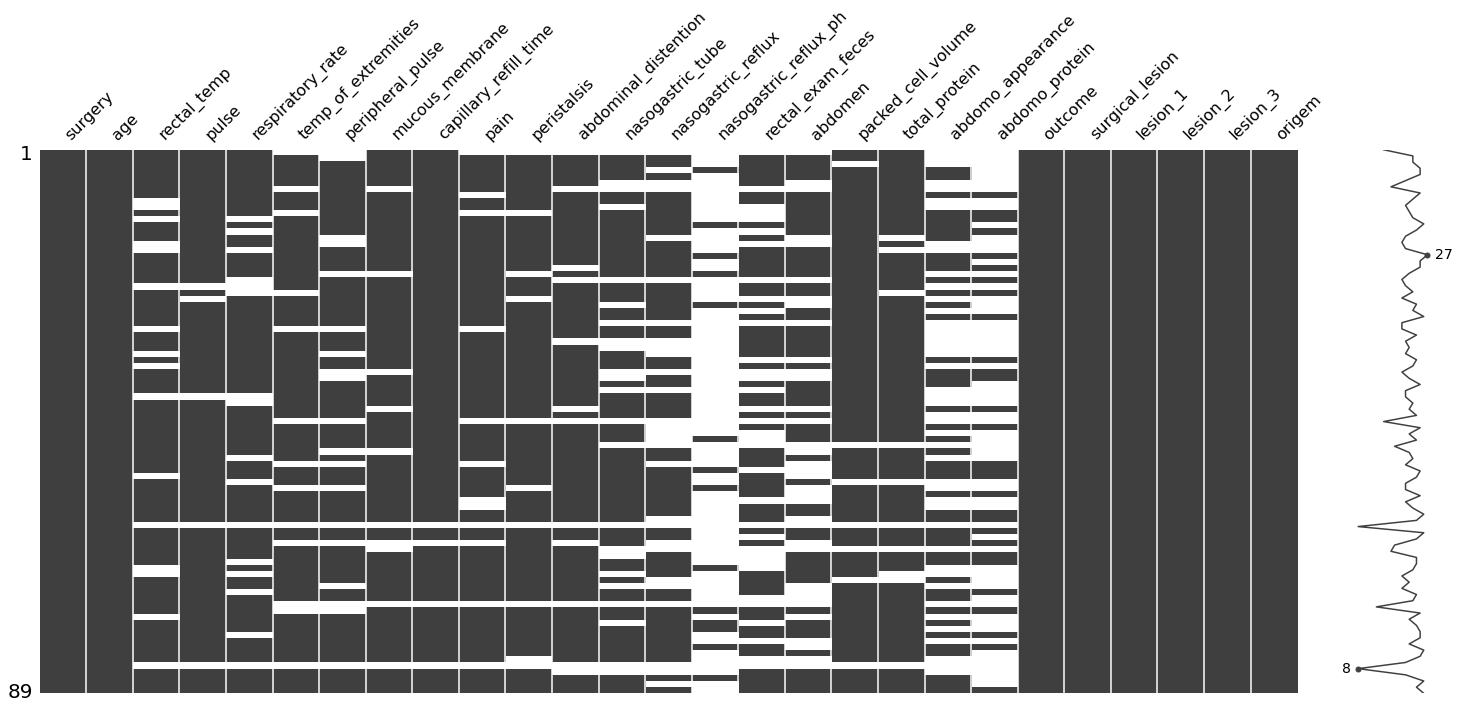

In [16]:
msno.matrix((data.loc[data.origem == 'teste']));

> **Como pode ser observado, tanto em treino como em teste, muitos atributos apresentam missing values, evidenciados pelos
> espaços em branco nos dois gráficos acima.
> Especialmente, *nasogastric_reflux_ph*, *abdomo_appearance* e *abdomo_protein*, parecem ser os atributos mais afetados
> por missing values e candidatos a descarte.**

## Pandas profiling

In [17]:
# !pip install --upgrade pandas_profiling
# ProfileReport(data)

## *Outliers*

In [18]:
# plotar boxplots de cada coluna de atributo numérico
# sns.set_theme(style="ticks")
# for c in numericas:
#     if 'lesion' not in c:
#         sns.boxplot(data=data[c])
#         ax = plt.gca()
#         ax.set_xlabel(c)
#         plt.show()
# e como trato outlier?

## Relação entre atributos

<Figure size 7200x1800 with 0 Axes>

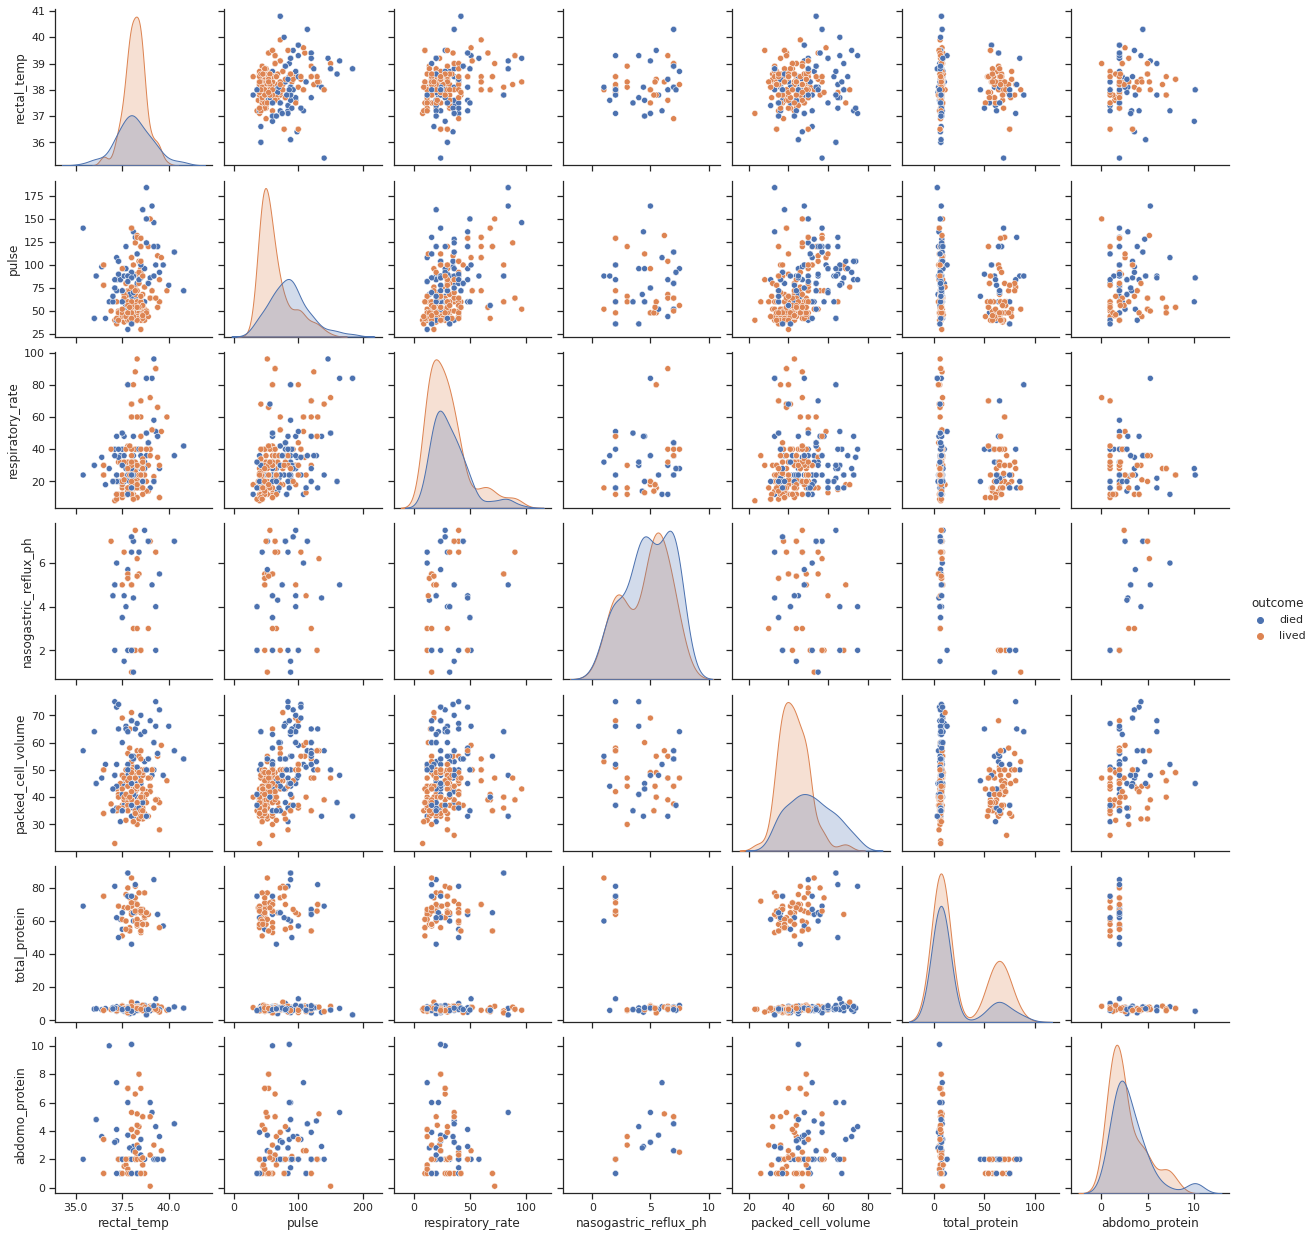

In [19]:
sns.set_theme(style="ticks")
plt.figure(figsize=(100,25));
# retirando lesion_1, lesion_2 e lesion_3 da análise por possuírem muitos registros iguais a zero
sns.pairplot(data.drop(columns=['lesion_1','lesion_2','lesion_3']), hue="outcome");

> **Base de teste foi gerada de forma estratificada.**

# Codificar atributos categóricos em numéricos

In [20]:
data = pd.get_dummies(data=data, columns=categoricas, drop_first=True)
data

rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  \
0          38.5   66.0              28.0                    NaN   
1          39.2   88.0              20.0                    NaN   
2          38.3   40.0              24.0                    NaN   
3          39.1  164.0              84.0                    5.0   
4          37.3  104.0              35.0                    NaN   
..          ...    ...               ...                    ...   
84          NaN    NaN               NaN                    NaN   
85         38.6   45.0              16.0                    NaN   
86         38.9   80.0              44.0                    7.0   
87         37.0   66.0              20.0                    NaN   
88         36.5  100.0              24.0                    NaN   

    packed_cell_volume  total_protein  abdomo_protein outcome  lesion_1  \
0                 45.0            8.4             NaN    died     11300   
1                 50.0           85.0             2.0    died      2208   
2                 33.0            6.7             NaN   lived         0   
3                 48.0            7.2             5.3    died      2208   
4                 74.0            7.4             NaN    died      4300   
..                 ...            ...             ...     ...       ...   
84                 NaN            NaN             NaN   lived      2124   
85                43.0           58.0             NaN   lived         0   
86                54.0            6.5             NaN    died      7111   
87                35.0            6.9             NaN    died     31110   
88                50.0            6.0             3.4   lived      2208   

    lesion_2  ...  rectal_exam_feces_decreased rectal_exam_feces_increased  \
0          0  ...                            1                           0   
1          0  ...                            0                           0   
2          0  ...                            0                           0   
3          0  ...                            1                           0   
4          0  ...                            0                           0   
..       ...  ...                          ...                         ...   
84         0  ...                            0                           0   
85         0  ...                            0                           0   
86         0  ...                            1                           0   
87         0  ...                            0                           0   
88         0  ...                            0                           0   

    rectal_exam_feces_normal  abdomen_distend_small  abdomen_firm  \
0                          0                      0             0   
1                          0                      0             0   
2                          1                      0             0   
3                          0                      0             0   
4                          0                      0             0   
..                       ...                    ...           ...   
84                         0                      0             0   
85                         1                      0             0   
86                         0                      0             0   
87                         1                      0             0   
88                         0                      1             0   

    abdomen_normal  abdomen_other  abdomo_appearance_cloudy  \
0                0              0                         0   
1                0              1                         1   
2                1              0                         0   
3                0              0                         0   
4                0              0                         0   
..             ...            ...                       ...   
84               0              0                         0   
85               1          

# Separação de treino e teste

In [21]:
df_treino = data.loc[data.origem == 'treino']
labels_treino = df_treino[label] # y_treino
feats_treino = df_treino.drop(columns=[label,'origem']) # X_treino

labels_treino.shape, feats_treino.shape

((299,), (299, 49))

In [22]:
df_teste = data.loc[data.origem == 'teste']
labels_teste = df_teste[label] # y_teste
feats_teste = df_teste.drop(columns=[label,'origem']) # X_teste

labels_teste.shape, feats_teste.shape

((89,), (89, 49))

# Balanceamento

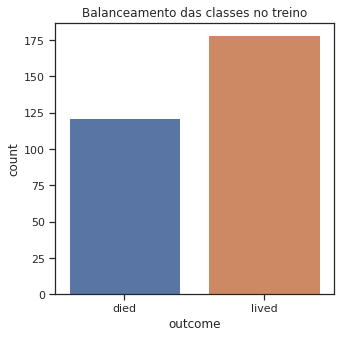

lived: 59.53%, died: 40.47%


In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data=pd.DataFrame(labels_treino), x=label, order=['died', 'lived'])
plt.title('Balanceamento das classes no treino')
plt.show();
lived, died = labels_treino.value_counts()
soma = sum((lived, died))
print(f'lived: {lived/soma*100:.2f}%, died: {died/soma*100:.2f}%')

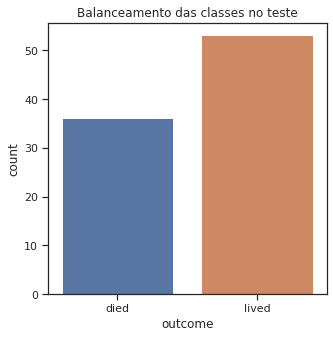

lived: 59.55%, died: 40.45%


In [24]:
plt.figure(figsize=(5,5))
sns.countplot(data=pd.DataFrame(labels_teste), x=label, order=['died', 'lived'])
plt.title('Balanceamento das classes no teste')
plt.show();
lived, died = labels_teste.value_counts()
soma = sum((lived, died))
print(f'lived: {lived/soma*100:.2f}%, died: {died/soma*100:.2f}%')

# Tratamento de missing values

In [25]:
imputers = {}
for attr in feats_treino.columns:
    if feats_treino[attr].isnull().count() > 0:
        if attr in categoricas:
            # se atributo é categórico uso a moda
            imputers[attr] = SimpleImputer(strategy='most_frequent').fit(feats_treino[[attr]])
        else:
            # se numérico, usa a mediana
            imputers[attr] = SimpleImputer(strategy='median').fit(feats_treino[[attr]])

# procurar no sklearn passar colunas no SimpleImputer

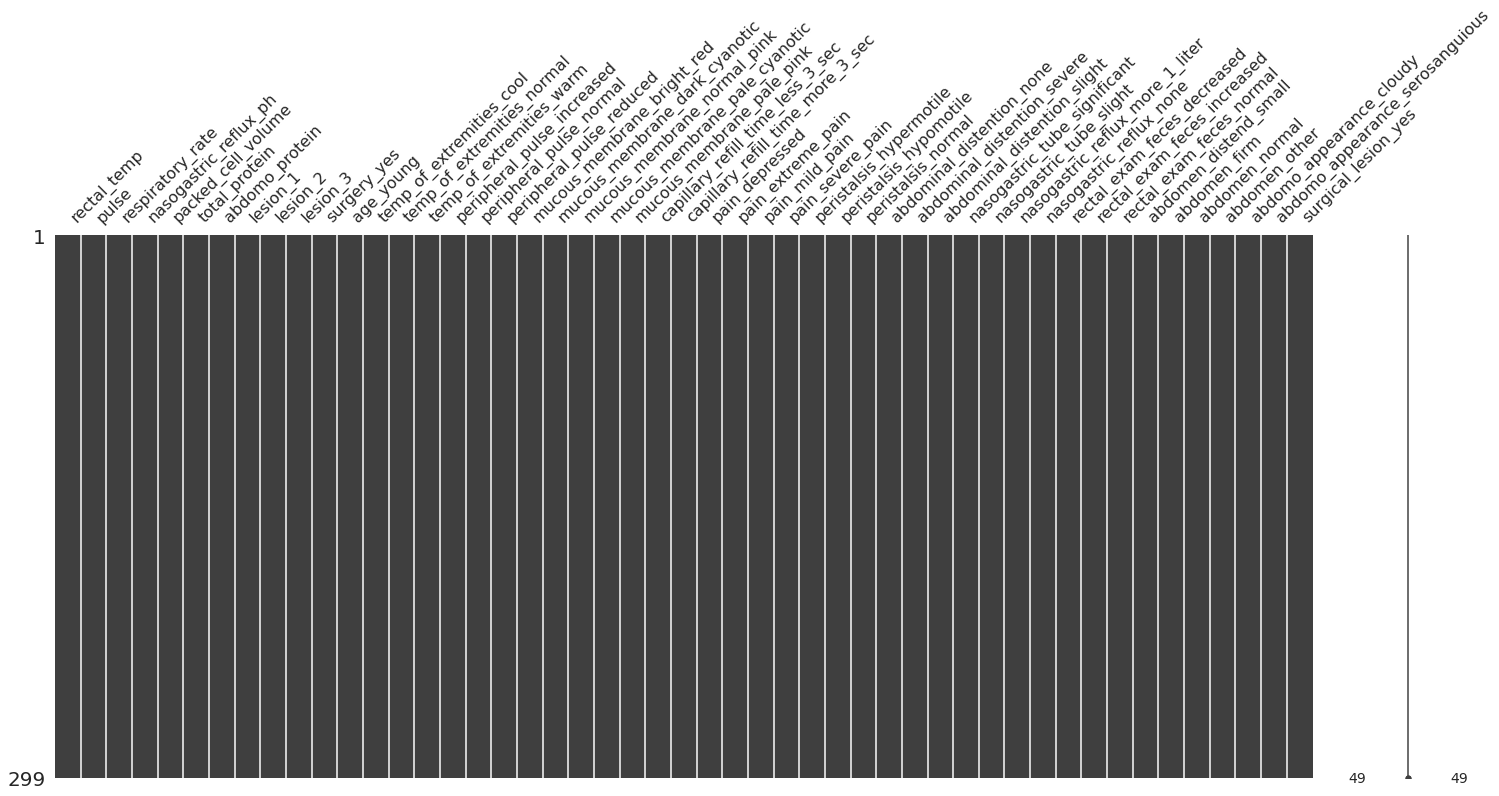

In [26]:
for attr in imputers:
    feats_treino[attr] = imputers[attr].transform(feats_treino[[attr]])

msno.matrix(feats_treino);

<AxesSubplot:>

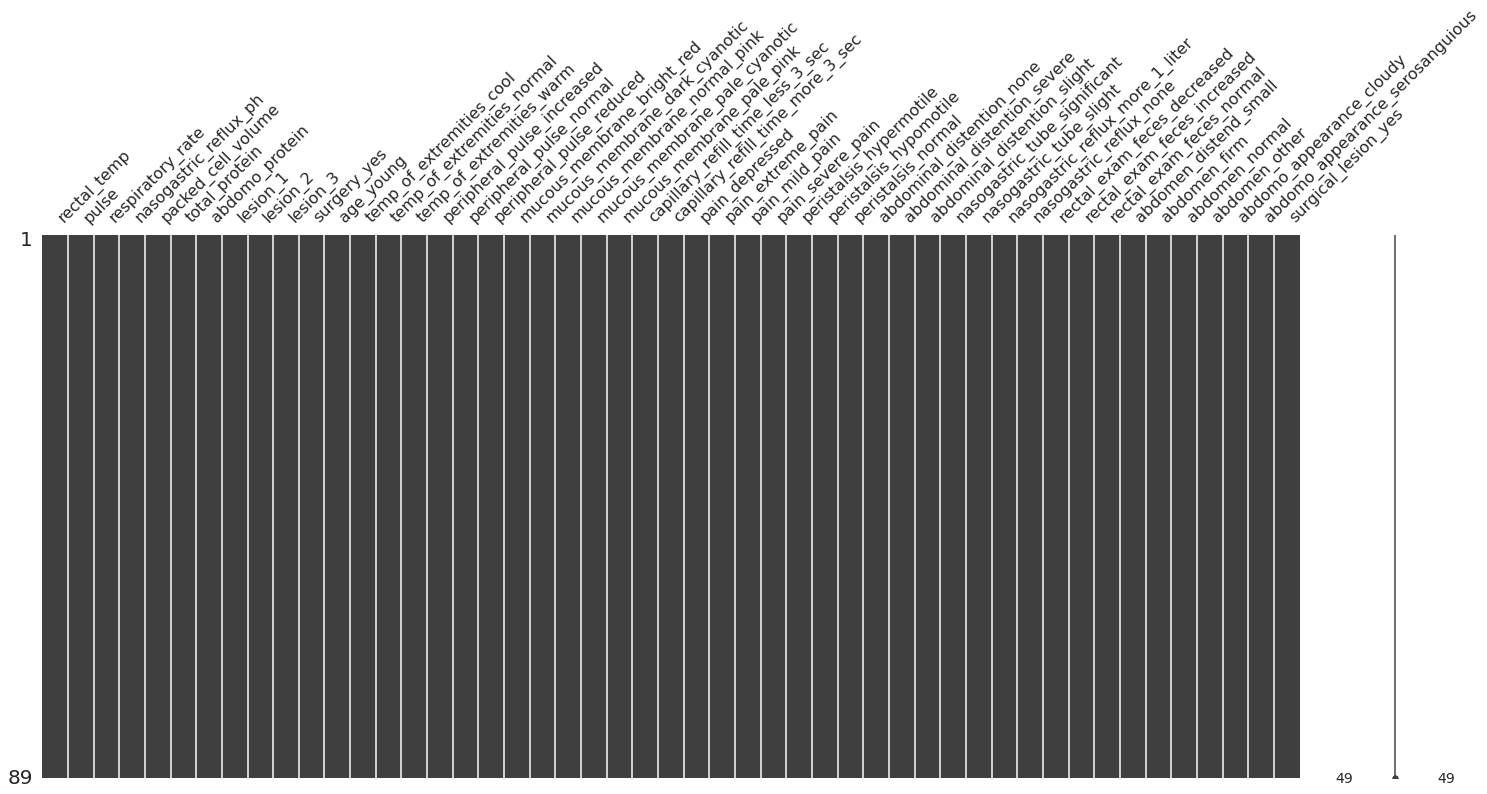

In [27]:
for attr in imputers:
    feats_teste[attr] = imputers[attr].transform(feats_teste[[attr]])

msno.matrix(feats_teste)

# Descartar atributos de variância zero

In [42]:
zerovar = VarianceThreshold(0.1).fit(feats_treino)
(zerovar.variances_ > 0.1).sum()

# identificar colunas descartadas

# substituir por PCA

38

In [29]:
feats_treino

rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  \
0           38.5   66.0              28.0                    5.0   
1           39.2   88.0              20.0                    5.0   
2           38.3   40.0              24.0                    5.0   
3           39.1  164.0              84.0                    5.0   
4           37.3  104.0              35.0                    5.0   
..           ...    ...               ...                    ...   
294         38.2  120.0              70.0                    5.0   
295         37.2   72.0              24.0                    5.0   
296         37.5   72.0              30.0                    5.0   
297         36.5  100.0              24.0                    5.0   
298         37.2   40.0              20.0                    5.0   

     packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  \
0                  45.0            8.4             2.3   11300.0       0.0   
1                  50.0           85.0             2.0    2208.0       0.0   
2                  33.0            6.7             2.3       0.0       0.0   
3                  48.0            7.2             5.3    2208.0       0.0   
4                  74.0            7.4             2.3    4300.0       0.0   
..                  ...            ...             ...       ...       ...   
294                55.0           65.0             2.3    3205.0       0.0   
295                44.0            7.5             3.3    2208.0       0.0   
296                60.0            6.8             2.3    3205.0       0.0   
297                50.0            6.0             3.4    2208.0       0.0   
298                36.0           62.0             1.0    6112.0       0.0   

     lesion_3  ...  rectal_exam_feces_decreased  rectal_exam_feces_increased  \
0         0.0  ...                          1.0                          0.0   
1         0.0  ...                          0.0                          0.0   
2         0.0  ...                          0.0                          0.0   
3         0.0  ...                          1.0                          0.0   
4         0.0  ...                          0.0                          0.0   
..        ...  ...                          ...                          ...   
294       0.0  ...                          0.0                          0.0   
295       0.0  ...                          0.0                          0.0   
296       0.0  ...                          1.0                          0.0   
297       0.0  ...                          0.0                          0.0   
298       0.0  ...                          0.0                          0.0   

     rectal_exam_feces_normal  abdomen_distend_small  abdomen_firm  \
0                         0.0                    0.0           0.0   
1                         0.0                    0.0           0.0   
2                         1.0                    0.0           0.0   
3                         0.0                    0.0           0.0   
4                         0.0                    0.0           0.0   
..                        ...                    ...           ...   
294                       0.0                    0.0           0.0   
295                       0.0                    1.0           0.0   
296                       0.0                    0.0           0.0   
297                       0.0                    1.0           0.0   
298                       0.0                    0.0           0.0   

     abdomen_normal  abdomen_other  abdomo_appearance_cloudy  \
0               0.0            0.0                       0.0   
1               0.0            1.0                       1.0   
2               1.0            0.0                       0.0   
3               0.0            0.0                       0.0   
4               0.0            0.0                       0.0   
..              ...            ...                       ...   
2

In [30]:
feats_treino = feats_treino[feats_treino.columns[zerovar.get_support(indices=True)]]
feats_treino

rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  \
0           38.5   66.0              28.0                    5.0   
1           39.2   88.0              20.0                    5.0   
2           38.3   40.0              24.0                    5.0   
3           39.1  164.0              84.0                    5.0   
4           37.3  104.0              35.0                    5.0   
..           ...    ...               ...                    ...   
294         38.2  120.0              70.0                    5.0   
295         37.2   72.0              24.0                    5.0   
296         37.5   72.0              30.0                    5.0   
297         36.5  100.0              24.0                    5.0   
298         37.2   40.0              20.0                    5.0   

     packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  \
0                  45.0            8.4             2.3   11300.0       0.0   
1                  50.0           85.0             2.0    2208.0       0.0   
2                  33.0            6.7             2.3       0.0       0.0   
3                  48.0            7.2             5.3    2208.0       0.0   
4                  74.0            7.4             2.3    4300.0       0.0   
..                  ...            ...             ...       ...       ...   
294                55.0           65.0             2.3    3205.0       0.0   
295                44.0            7.5             3.3    2208.0       0.0   
296                60.0            6.8             2.3    3205.0       0.0   
297                50.0            6.0             3.4    2208.0       0.0   
298                36.0           62.0             1.0    6112.0       0.0   

     lesion_3  ...  abdominal_distention_slight  nasogastric_tube_slight  \
0         0.0  ...                          0.0                      0.0   
1         0.0  ...                          1.0                      0.0   
2         0.0  ...                          0.0                      0.0   
3         0.0  ...                          0.0                      0.0   
4         0.0  ...                          0.0                      0.0   
..        ...  ...                          ...                      ...   
294       0.0  ...                          0.0                      0.0   
295       0.0  ...                          0.0                      0.0   
296       0.0  ...                          0.0                      1.0   
297       0.0  ...                          0.0                      0.0   
298       0.0  ...                          0.0                      0.0   

     nasogastric_reflux_more_1_liter  nasogastric_reflux_none  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   
..                               ...                      ...   
294                              0.0                      0.0   
295                              0.0                      1.0   
296                              0.0                      1.0   
297                              0.0                      1.0   
298                              0.0                      0.0   

     rectal_exam_feces_decreased  rectal_exam_feces_normal  \
0                            1.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       1.0   
3                            1.0                       0.0   
4                            0.0                       0.0   
..                           ...                       ...   
294                          0.0                       0.0   
295                          0.0                       0.0   

In [31]:
feats_teste = feats_teste[feats_teste.columns[zerovar.get_support(indices=True)]]
feats_teste

rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  \
0          37.3  104.0              35.0                    5.0   
1          39.1   72.0              52.0                    5.0   
2          37.2   42.0              12.0                    5.0   
3          38.0   92.0              28.0                    7.2   
4          37.6   64.0              21.0                    5.0   
..          ...    ...               ...                    ...   
84         38.2   64.0              25.0                    5.0   
85         38.6   45.0              16.0                    5.0   
86         38.9   80.0              44.0                    7.0   
87         37.0   66.0              20.0                    5.0   
88         36.5  100.0              24.0                    5.0   

    packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  \
0                 74.0            7.4             2.3    4300.0       0.0   
1                 50.0            7.8             2.3    2111.0       0.0   
2                 45.0            7.0             2.3    4124.0       0.0   
3                 37.0            6.1             2.3       0.0       0.0   
4                 40.0            7.0             2.3    4205.0       0.0   
..                 ...            ...             ...       ...       ...   
84                45.0            7.5             2.3    2124.0       0.0   
85                43.0           58.0             2.3       0.0       0.0   
86                54.0            6.5             2.3    7111.0       0.0   
87                35.0            6.9             2.3   31110.0       0.0   
88                50.0            6.0             3.4    2208.0       0.0   

    lesion_3  ...  abdominal_distention_slight  nasogastric_tube_slight  \
0        0.0  ...                          0.0                      0.0   
1        0.0  ...                          1.0                      0.0   
2        0.0  ...                          0.0                      0.0   
3        0.0  ...                          1.0                      0.0   
4        0.0  ...                          0.0                      0.0   
..       ...  ...                          ...                      ...   
84       0.0  ...                          0.0                      0.0   
85       0.0  ...                          0.0                      0.0   
86       0.0  ...                          0.0                      1.0   
87       0.0  ...                          0.0                      0.0   
88       0.0  ...                          0.0                      0.0   

    nasogastric_reflux_more_1_liter  nasogastric_reflux_none  \
0                               0.0                      0.0   
1                               0.0                      1.0   
2                               0.0                      1.0   
3                               0.0                      0.0   
4                               0.0                      1.0   
..                              ...                      ...   
84                              0.0                      0.0   
85                              0.0                      0.0   
86                              0.0                      0.0   
87                              0.0                      0.0   
88                              0.0                      1.0   

    rectal_exam_feces_decreased  rectal_exam_feces_normal  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       1.0   
4                           0.0                       0.0   
..                          ...                       ...   
84                          0.0                       0.0   
85                          0.0                       1.0   
86                          1.0                       0

> **Não há atributos com variância zero para ser descartado**

# Definição da cadeia de pré-processamento

## Normalização dos dados

In [33]:
normalizer = StandardScaler().fit(feats_treino)
cadeia_preprocessamento['SVC'].append(normalizer)
cadeia_preprocessamento['KNN'].append(normalizer)
# aplicar normalização nas árvores também

# Modelos

## SVC

### Sem pré-processamento

Acurácia:  0.651685393258427
Kappa:  0.23254520166898474
F1:  0.6323373379060251


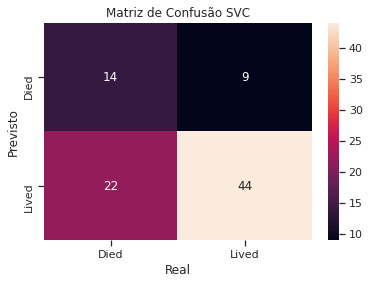

In [34]:
modelo_svc = treinaSVC(feats_treino, labels_treino)
avalia(feats_teste, labels_teste, modelo_svc, titulo='SVC')

### Com pré-processamento

Acurácia:  0.7303370786516854
Kappa:  0.4141524958859024
F1:  0.720213470647786


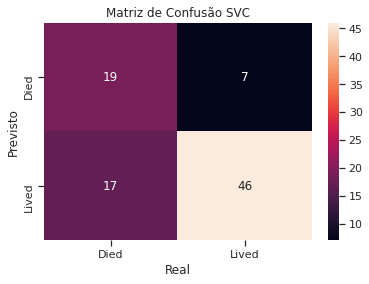

In [35]:
modelo_svc = treinaSVC(preprocessaSVC(feats_treino), labels_treino)
avalia(preprocessaSVC(feats_teste), labels_teste, modelo_svc, titulo='SVC')

### Grid Search

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Parâmetros do modelo:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Acurácia:  1.0
Kappa:  1.0
F1:  1.0


/home/rodmonte/programas/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


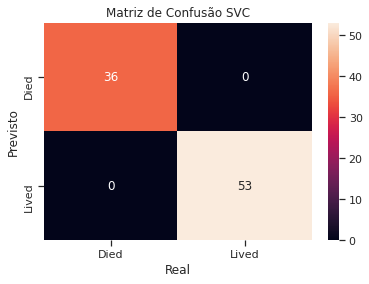

In [36]:
svc_tuned_parameters = [
    {
#         'kernel': ['linear', 'rbf', 'poly'], 
        'kernel': [ 'rbf', 'poly', 'linear' ], 
        'gamma': [ 1, 0.1, ],
        'C': [ 10, 100, 1000 ],
    }
]

modelo_svc = GridSearchCV(SVC(), svc_tuned_parameters, scoring='f1', n_jobs=-1, verbose=3)
modelo_svc.fit(preprocessaSVC(feats_treino), labels_treino)

print('Parâmetros do modelo: ', modelo_svc.best_params_)

avalia(preprocessaSVC(feats_teste), labels_teste, modelo_svc, titulo="SVC")

## Decision Tree

### Modelo

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


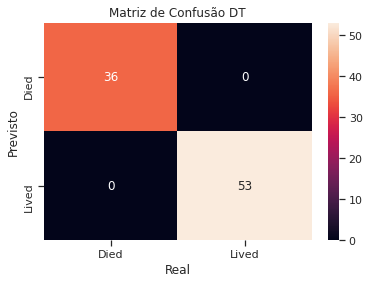

In [37]:
modelo_dt = treinaDT(preprocessaDT(feats_treino), labels_treino)
avalia(preprocessaDT(feats_teste), labels_teste, modelo_dt, titulo='DT')

### Plot da árvore

In [38]:
fig, ax = plt.subplots(figsize=(200, 100))
tree.plot_tree(modelo_dt, class_names=['Died', 'Lived'], filled=True, rounded=True);

## Random Forest

### Modelo

Acurácia:  1.0
Kappa:  1.0
F1:  1.0


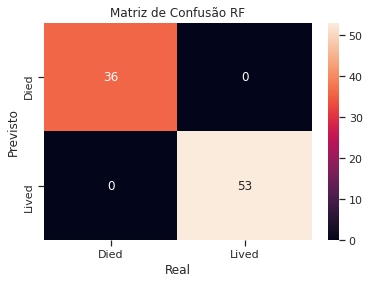

In [39]:
modelo_rf = treinaRF(preprocessaRF(feats_treino), labels_treino)
avalia(preprocessaRF(feats_teste), labels_teste, modelo_rf, titulo='RF')

## KNN

### Modelo

Acurácia:  0.7640449438202247
Kappa:  0.5123923819462562
F1:  0.764537478836386


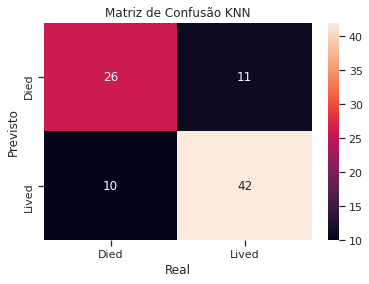

In [40]:
modelo_knn = treinaKNN(preprocessaKNN(feats_treino), labels_treino)
avalia(preprocessaKNN(feats_teste), labels_teste, modelo_knn, titulo='KNN')

### Grid Search

Parâmetros do modelo:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Acurácia:  1.0
Kappa:  1.0
F1:  1.0


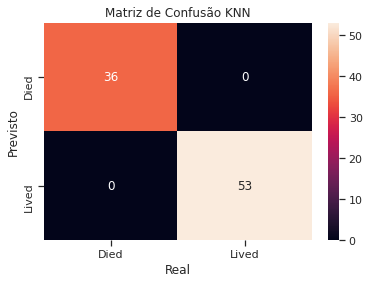

In [41]:
knn_tuned_parameters = [
    {
        'n_neighbors': range(5,10),
        'metric': [ 'minkowski', 'euclidean', 'manhattan', 'chebyshev' ],
        'weights': [ 'uniform', 'distance'],
    }
]

modelo_knn = GridSearchCV(KNeighborsClassifier(), knn_tuned_parameters, scoring='f1_micro', n_jobs=8)
modelo_knn.fit(preprocessaKNN(feats_treino), labels_treino)

print('Parâmetros do modelo: ', modelo_knn.best_params_)

avalia(preprocessaKNN(feats_teste), labels_teste, modelo_knn, titulo="KNN")